# RiskTrend: Predictive Analytics for IFRS 9 Compliance


## Outline

### 1. Understanding the Dataset
We'll start by loading the dataset and examining its structure. This will give us insights into the features available and the kind of analysis we can perform.

### 2. Data Cleaning
We'll identify any missing or anomalous data and address these issues.

### 3. Exploratory Data Analysis (EDA)
We'll visualize the data to understand the distribution, relationships, and potential trends or patterns.

### 4. Feature Engineering
Based on the insights from EDA, we might need to create new features or transform existing ones to better model the credit risk.

### 5. Modeling
We'll choose a suitable machine learning model, train it, and evaluate its performance.

### 6. Validation
We'll use techniques like cross-validation to ensure that our model performs well on unseen data.

### 7. Conclusion & Next Steps
Based on the results, we'll decide on the next steps.



## Step 1: Understanding the Dataset

Let's start by loading the dataset and examining its structure. We'll check the first few rows to get a sense of the data, its columns, and the kind of information it contains.

Let's load the dataset and inspect the first few rows.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel("/content/5721-Training_dataset(1) - Copy.xlsx")

# Display the first few rows of the dataset
data.head()


,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0


The dataset contains multiple columns, labeled as `mvar1` through `mvar47`, along with an `application_key` and a `default_ind` column. The `default_ind` column seems to be the target variable, indicating whether a certain application defaulted (1) or not (0).

### A few observations:

- There are missing values represented as 'missing' and 'na'.
- Some columns have numerical data, while others, like `mvar47`, contain categorical data.

### For a comprehensive analysis, we should:

1. Understand the nature of each column (i.e., categorical vs. numerical).
2. Address the missing values appropriately.
3. Understand the distribution of the target variable, `default_ind`.

Let's start by checking the distribution of the target variable. This will give us an idea of the balance between the classes.


In [2]:
# Distribution of the target variable
default_distribution = data['default_ind'].value_counts(normalize=True) * 100

default_distribution


0    78.39392
1    21.60608
Name: default_ind, dtype: float64

The distribution of the target variable, `default_ind`, is as follows:

- Non-default (0): Approximately 78.39%
- Default (1): Approximately 21.61%

This indicates that the dataset is somewhat imbalanced, with a higher proportion of non-default cases compared to default cases. This is a common scenario in credit risk modeling, as defaults are typically less frequent than non-defaults.

Now,  Let's load the second sheet from the Excel file to inspect the variable names and descriptions. This will give us a better understanding of each column and its significance.



In [3]:
# Load the second sheet containing variable names and descriptions
variable_descriptions = pd.read_excel("/content/5721-Training_dataset(1) - Copy.xlsx", sheet_name=1)

variable_descriptions


,Name,Definition
0,application_key,Application ID (primary key)
1,mvar1,Credit worthiness score calculated on the basi...
2,mvar2,A score calculated based on the number and ris...
3,mvar3,Severity of default by the borrower on any loa...
4,mvar4,Severity of default by the borrower on auto lo...
5,mvar5,Severity of default by the borrower on educati...
6,mvar6,Minimum of credit available on all revolving c...
7,mvar7,Maximum of credit available on all active cred...
8,mvar8,Maximum of credit available on all active revo...
9,mvar9,Sum of available credit on credit cards that t...


Here's a brief overview of some of the columns:

- `application_key`: Application ID (primary key)
- `mvar1` to `mvar47`: Various features that include credit scores, severity of default on different types of loans, credit availability, dues, annual income, property market value, number of credit cards, utilization rates, tenures, and other financial metrics.
- `default_ind`: Indicator for default. This is our target variable.

Given these descriptions, we can infer that:

1. Most of the variables are numerical in nature, representing various credit-related metrics.
2. `mvar47` is categorical and indicates the type of product that the applicant applied for.

Before proceeding to data cleaning, let's check the data types of the columns in the dataset to confirm our understanding. Additionally, we'll see the number of missing values for each column.


In [4]:
# Check data types of columns
column_data_types = data.dtypes

# Check number of missing values for each column
missing_values = data.replace(['missing', 'na'], [None, None]).isnull().sum()

column_info = pd.DataFrame({
    'Data Type': column_data_types,
    'Missing Values': missing_values
})

column_info


,Data Type,Missing Values
application_key,int64,0
mvar1,object,874
mvar2,float64,1553
mvar3,float64,132
mvar4,float64,132
mvar5,float64,132
mvar6,object,4764
mvar7,object,1839
mvar8,object,4764
mvar9,object,2729


### Summary of Data Types and Missing Values

- Most columns are of type `object`, which suggests they might contain mixed data types, especially since we've seen placeholders like 'missing' and 'na' in the dataset.
- `mvar47` is of type `object`, confirming our understanding that it's a categorical column.
- Several columns have a significant number of missing values, with some columns missing over half of their values, such as `mvar40` and `mvar41`.

## Step 2: Data Cleaning

1. **Convert Columns to Appropriate Data Types**: Convert numerical columns represented as objects to `float` or `int` as required.
2. **Handle Missing Values**: There are multiple ways to address missing values, including imputation with mean/median/mode, using algorithms that can handle missing data, or advanced techniques like KNN imputation.
3. **Handle Categorical Columns**: Convert categorical columns like `mvar47` into a format suitable for modeling, typically using one-hot encoding or label encoding.


Alright, let's tackle the data cleaning step by step.
### Step 1: Convert Columns to Appropriate Data Types

We'll start by converting the columns that are of type `object` but should be numerical. We'll convert them to `float` data type for now. Any non-convertible values will be set to `NaN` (Not a Number), which we will address in the next step.


In [5]:
# Convert columns of type 'object' to 'float', setting errors='coerce' to turn non-convertible values to NaN
for column in data.columns:
    if data[column].dtype == 'object' and column not in ['mvar47']:
        data[column] = pd.to_numeric(data[column], errors='coerce')

# Check the updated data types and missing values
updated_data_types = data.dtypes
updated_missing_values = data.isnull().sum()

updated_column_info = pd.DataFrame({
    'Data Type': updated_data_types,
    'Missing Values': updated_missing_values
})

updated_column_info


,Data Type,Missing Values
application_key,int64,0
mvar1,float64,874
mvar2,float64,1553
mvar3,float64,132
mvar4,float64,132
mvar5,float64,132
mvar6,float64,4764
mvar7,float64,1839
mvar8,float64,4764
mvar9,float64,2729


The columns have been successfully converted to appropriate data types. As expected, columns that had 'missing' and 'na' values have been converted to NaN, and we can see the updated count of missing values for each column.

### Step 2: Handle Missing Values

There are several strategies to handle missing values:

- **Mean/Median Imputation**: Impute missing values with the mean (for normally distributed data) or median (for skewed data) of the column.
- **Mode Imputation**: For categorical columns, impute missing values with the mode.
- **KNN Imputation**: Use K-Nearest Neighbors to estimate and impute missing values.
- **Deletion**: In cases where the missing data is too much, it might be better to remove the column altogether.

For simplicity, we'll start with Mean/Median imputation for numerical columns. However, before imputation, it's a good idea to check the distribution of a few columns with missing values to decide whether to use the mean or median.


Let's visualize the distribution for a few columns with missing values.


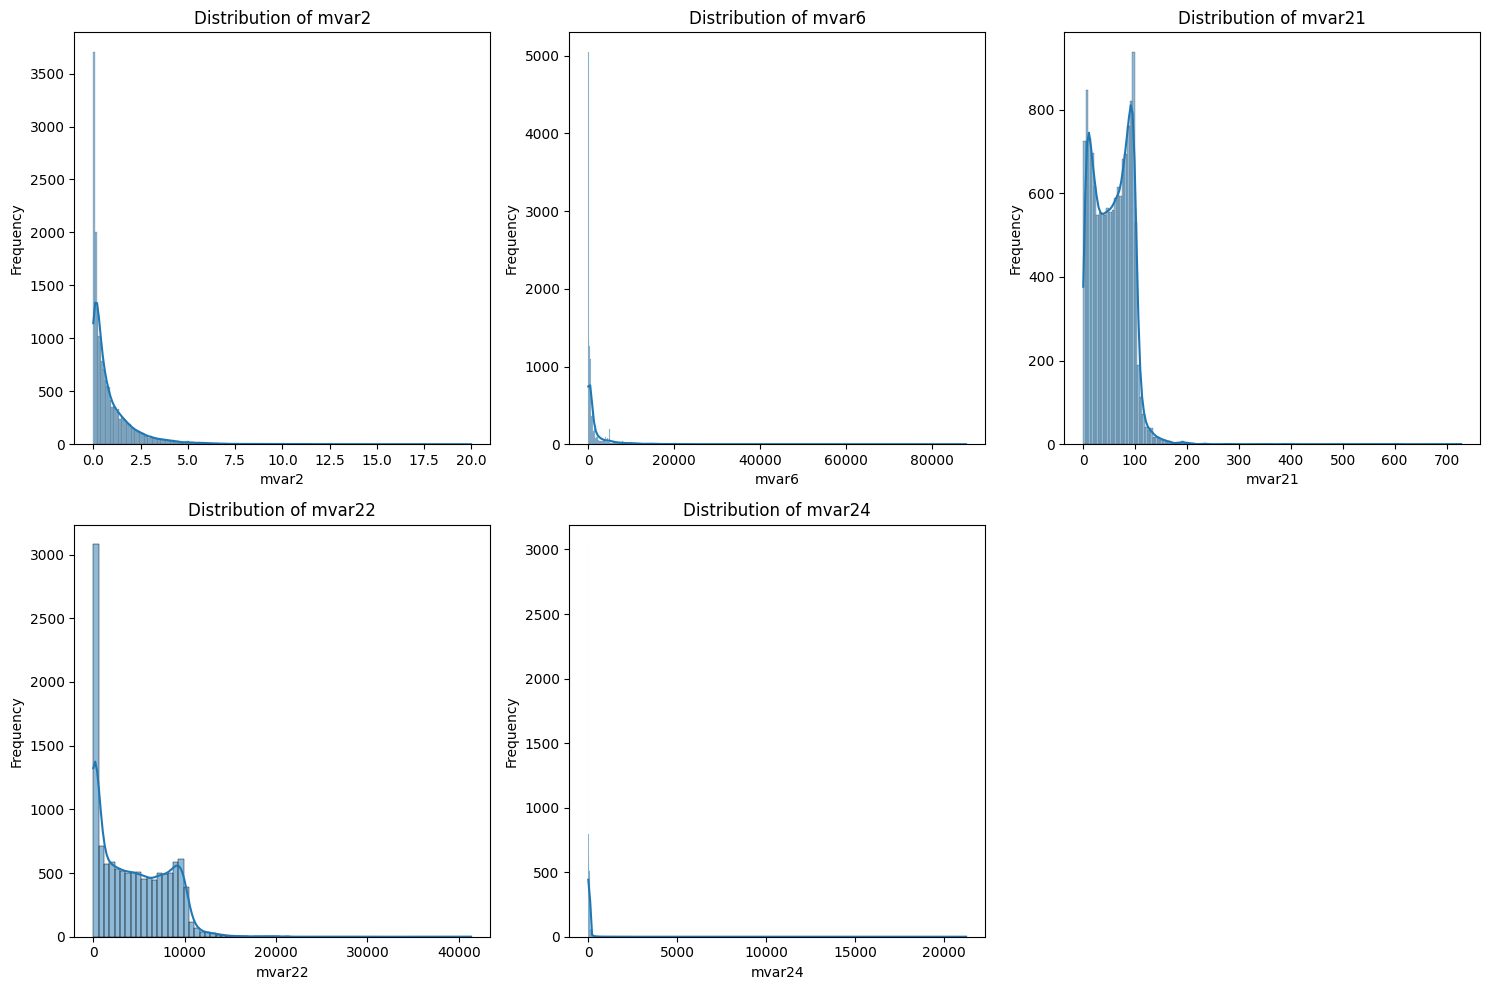

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a few columns with missing values for visualization
columns_to_visualize = ['mvar2', 'mvar6', 'mvar21', 'mvar22', 'mvar24']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms provide insights into the distributions of the selected columns:

- `mvar2`, `mvar21`, and `mvar22` appear to be right-skewed.
- `mvar6` and `mvar24` also seem slightly right-skewed.

Given these skewed distributions, it would be more appropriate to use the median to impute the missing values for these columns, as the median is less sensitive to outliers and skewness than the mean.

Let's proceed with median imputation for the numerical columns. For the categorical column `mvar47`, we'll use mode imputation.


In [7]:
# Median imputation for numerical columns
for column in data.columns:
    if data[column].dtype in ['float64', 'int64'] and column not in ['default_ind']:
        data[column].fillna(data[column].median(), inplace=True)

# Mode imputation for the categorical column 'mvar47'
data['mvar47'].fillna(data['mvar47'].mode()[0], inplace=True)

# Check the updated count of missing values
updated_missing_values = data.isnull().sum()

updated_missing_values


application_key    0
mvar1              0
mvar2              0
mvar3              0
mvar4              0
mvar5              0
mvar6              0
mvar7              0
mvar8              0
mvar9              0
mvar10             0
mvar11             0
mvar12             0
mvar13             0
mvar14             0
mvar15             0
mvar16             0
mvar17             0
mvar18             0
mvar19             0
mvar20             0
mvar21             0
mvar22             0
mvar23             0
mvar24             0
mvar25             0
mvar26             0
mvar27             0
mvar28             0
mvar29             0
mvar30             0
mvar31             0
mvar32             0
mvar33             0
mvar34             0
mvar35             0
mvar36             0
mvar37             0
mvar38             0
mvar39             0
mvar40             0
mvar41             0
mvar42             0
mvar43             0
mvar44             0
mvar45             0
mvar46             0
mvar47       

All missing values have been successfully imputed.  
### Step 3: Handle Categorical Columns

We have one categorical column, `mvar47`. We'll convert it into a format suitable for modeling using one-hot encoding. One-hot encoding creates a new binary column for each category/label in the original column.

Let's perform one-hot encoding for the `mvar47` column.


In [8]:
# One-hot encoding for the 'mvar47' column
data = pd.get_dummies(data, columns=['mvar47'], drop_first=True)

# Display the first few rows of the updated dataset
data.head()


,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,default_ind,mvar47_L
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,...,1.0,73.780,82.547,0.08696,10.0,0.63899,0.0,0.0,0,0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,...,0.0,99.129,78.717,0.00000,13.0,0.63836,0.0,0.0,1,1
2,230034,1745.0,0.4001,0.000,0.0,0.0,343.0,2536.0,2857.0,15542.0,...,0.0,100.000,29.290,0.00000,1.0,1.00000,0.0,0.0,1,0
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,...,0.0,96.272,78.717,0.15385,3.0,0.53241,0.0,0.0,0,1
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,...,0.0,115.019,78.717,0.00000,1.0,0.92665,0.0,0.0,0,1


The `mvar47` column has been successfully one-hot encoded. We now have a new binary column named `mvar47_L`, which indicates the type of product the applicant applied for. A value of 1 represents the 'L' category, while a value of 0 represents the other category (which was dropped to avoid multicollinearity).

With these preprocessing steps completed, our dataset is now ready for Exploratory Data Analysis (EDA) and modeling.


## Step 3: Exploratory Data Analysis (EDA)

In the EDA phase, we'll try to understand the data better by visualizing it. This will help us identify patterns, relationships, anomalies, and more. Here's a breakdown of the tasks we'll undertake during EDA:

- **Distribution of Target Variable**: We've already seen this, but visualizing it can provide more insights.
- **Distribution of Key Features**: Understanding the distribution of some primary features.
- **Correlation Analysis**: Identifying if there are any highly correlated features.
- **Visualize Relationships**: Using scatter plots, box plots, etc., to visualize relationships between key features and the target variable.

Let's start by visualizing the distribution of the target variable (`default_ind`).


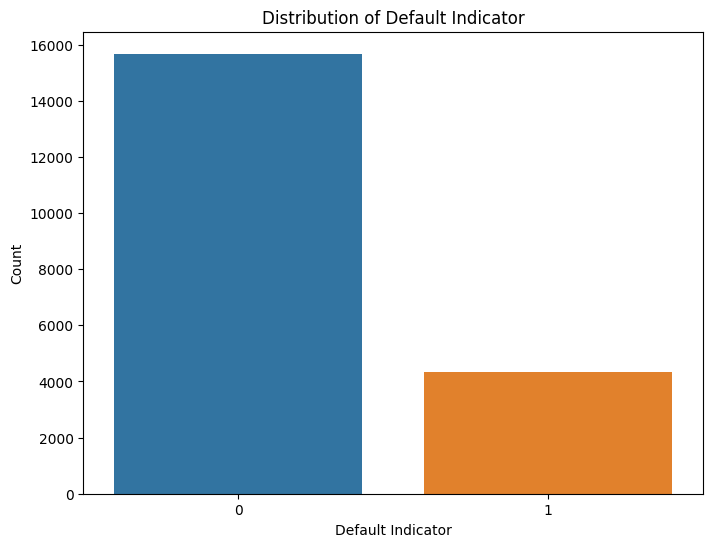

In [9]:
# Visualizing the distribution of the target variable 'default_ind'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='default_ind')
plt.title('Distribution of Default Indicator')
plt.xlabel('Default Indicator')
plt.ylabel('Count')
plt.show()


The visual representation confirms our previous findings about the distribution of the `default_ind` column. We have a higher number of non-default cases (0) compared to default cases (1).

Next, let's visualize the distribution of some key features. We'll select a mix of features:

- Credit worthiness score (`mvar1`)
- Severity of default on any loan (`mvar3`)
- Annual income (`mvar14`)
- Average utilization of active revolving credit lines (`mvar21`)

We'll use histograms to visualize the distribution of these features.


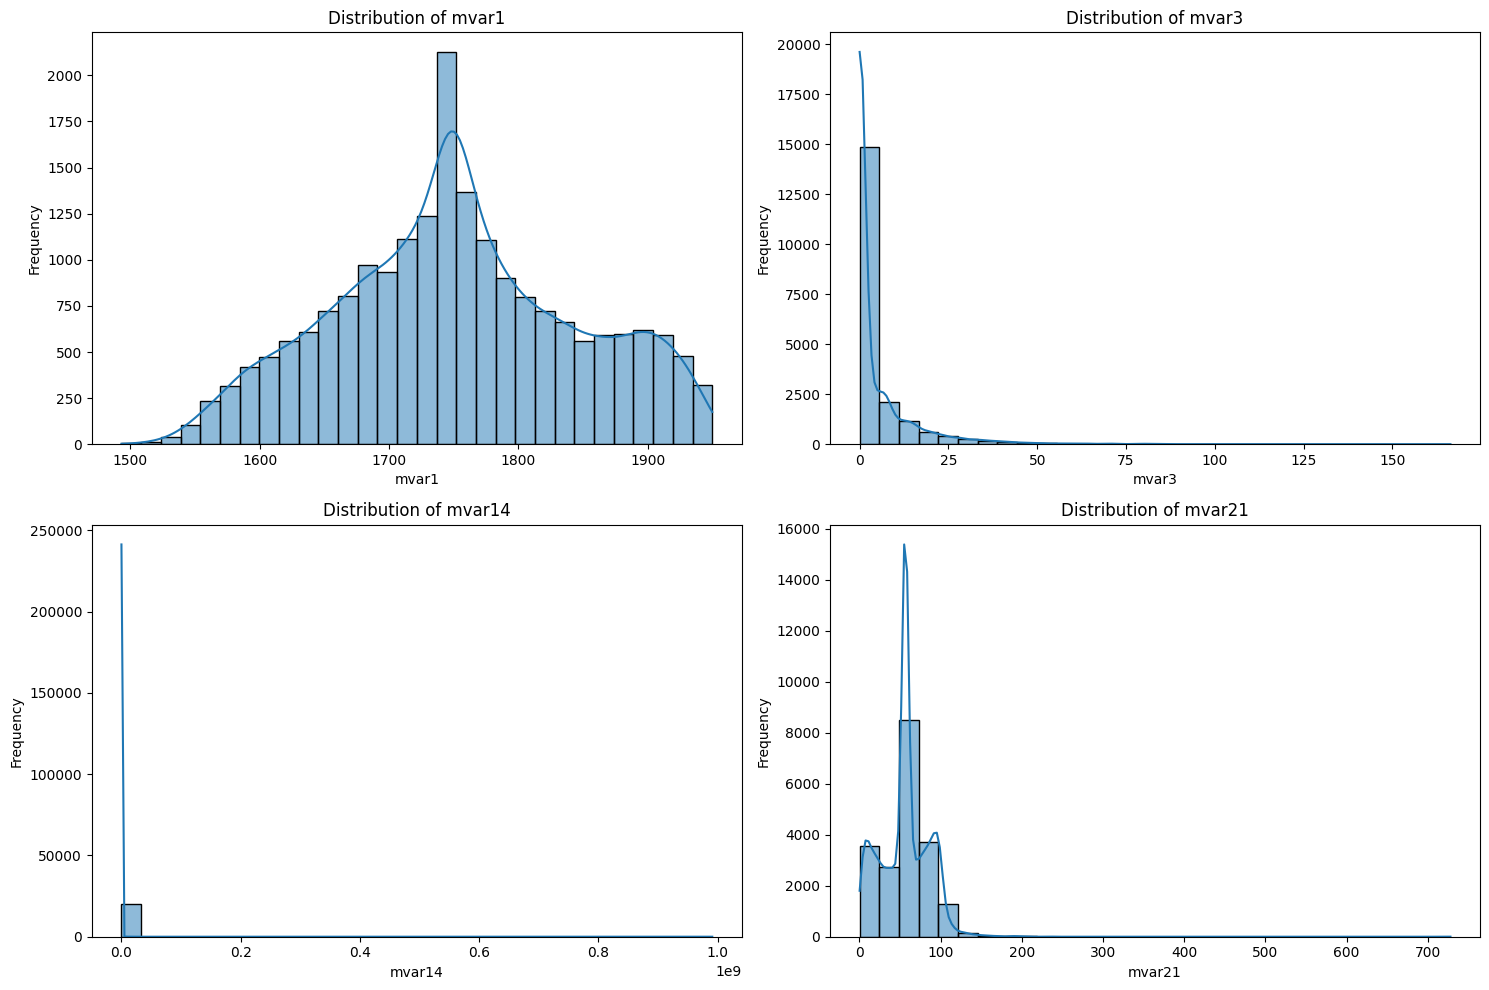

In [10]:
# Selecting key features for visualization
key_features = ['mvar1', 'mvar3', 'mvar14', 'mvar21']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Here are the visual distributions of the selected key features:

- **mvar1 (Credit worthiness score)**: The distribution appears to be somewhat left-skewed with a majority of the scores concentrated towards the higher range.
- **mvar3 (Severity of default on any loan)**: Most of the values are clustered towards the lower end, indicating that a majority of the borrowers have a low severity of default.
- **mvar14 (Annual income)**: The income distribution is highly right-skewed, suggesting that most applicants have incomes on the lower side with a few exceptions on the higher end.
- **mvar21 (Average utilization of active revolving credit lines)**: This distribution is also right-skewed, indicating that many borrowers have a lower utilization rate.

Next, let's analyze the correlation among the features to check if there are any highly correlated pairs. This can be useful to identify redundant features or multicollinearity.


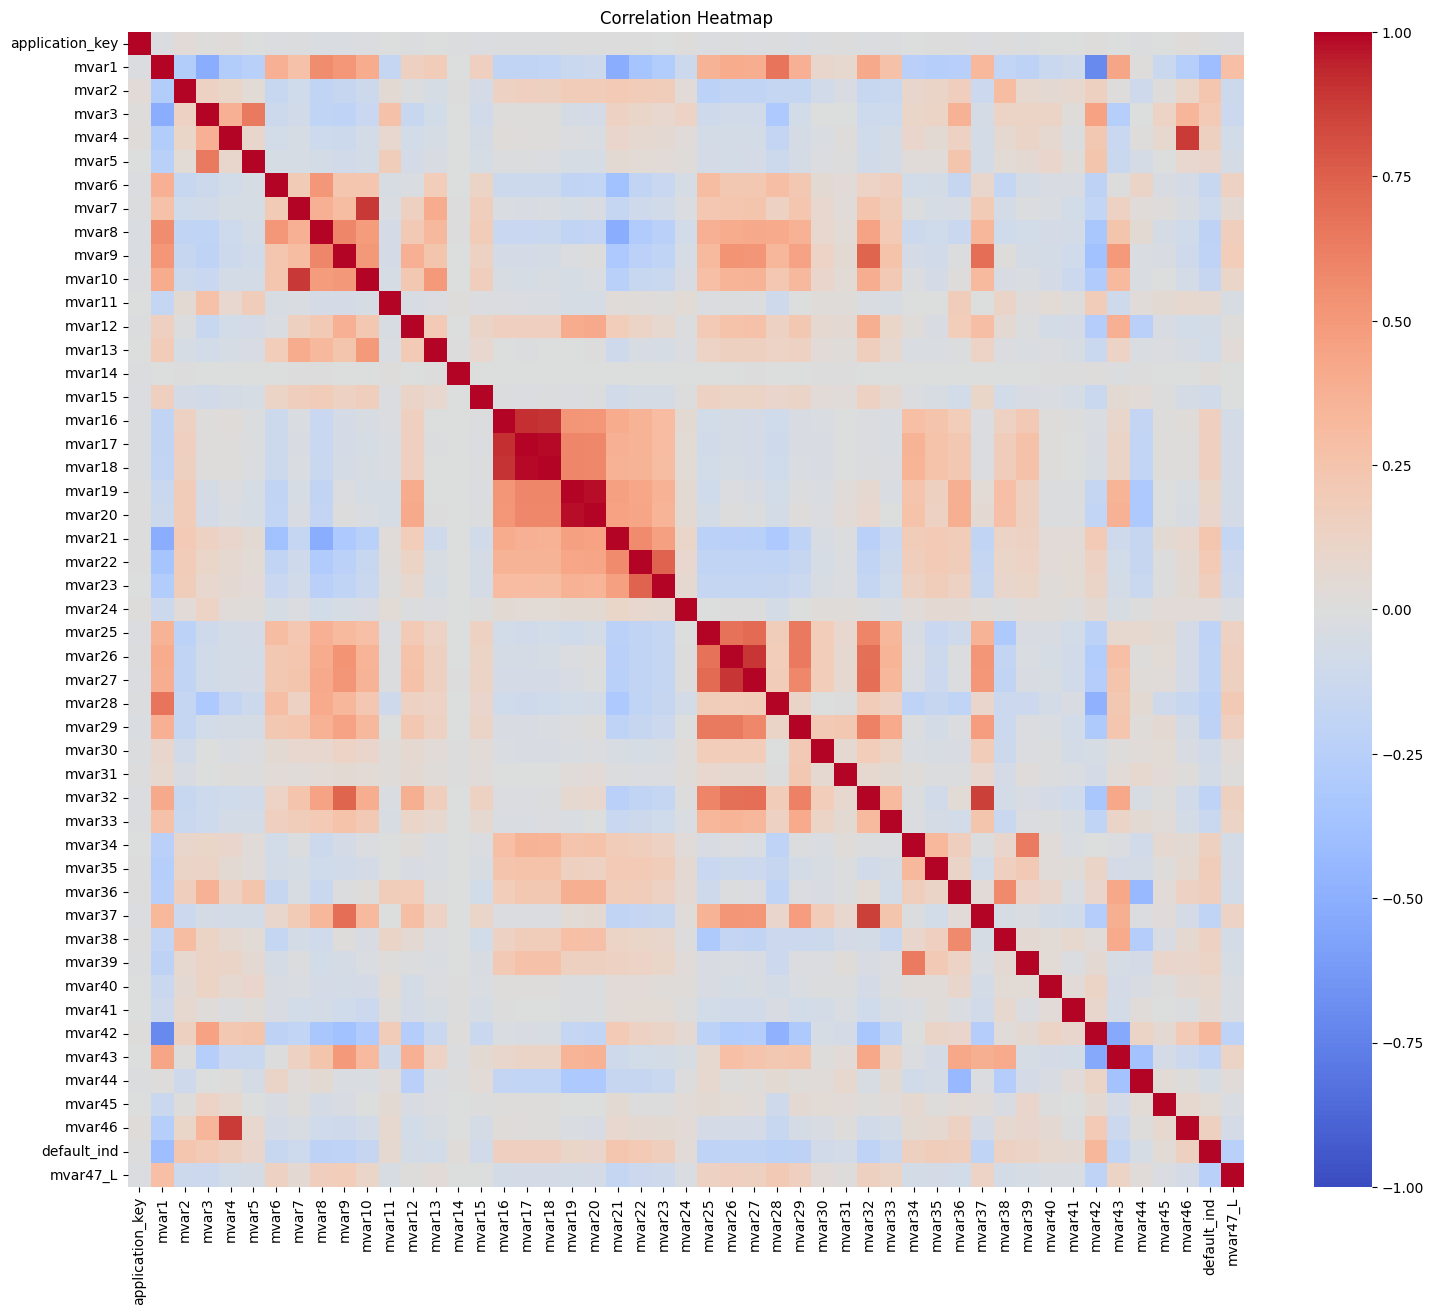

In [11]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


The heatmap gives us a visual representation of how features correlate with each other:

- Dark blue areas indicate a strong positive correlation.
- Dark red areas indicate a strong negative correlation.
- Neutral colors (close to white) indicate little to no correlation.

A few observations from the heatmap:

- Some features are highly correlated with each other, suggesting potential multicollinearity. This can be an issue for some models, like linear regression, as it can make the model unstable.
- The last row/column represents the correlation of features with the target variable `default_ind`. This gives us a preliminary idea of which features might be more relevant in predicting the target.

For a more precise understanding, we can list the features that have the highest correlation with the target variable, `default_ind`.


In [12]:
# Extracting correlations of all features with the target variable 'default_ind'
correlations_with_target = correlation_matrix['default_ind'].sort_values(ascending=False)

# Displaying the features with highest correlation (both positive and negative) with 'default_ind'
top_correlations_with_target = pd.concat([correlations_with_target.head(10), correlations_with_target.tail(10)])

top_correlations_with_target


default_ind    1.000000
mvar42         0.341952
mvar2          0.238418
mvar21         0.237481
mvar3          0.210299
mvar22         0.205347
mvar35         0.177207
mvar23         0.171553
mvar36         0.165262
mvar17         0.163122
mvar37        -0.198523
mvar26        -0.201527
mvar9         -0.206005
mvar25        -0.208409
mvar32        -0.209938
mvar29        -0.211755
mvar8         -0.214926
mvar28        -0.219311
mvar47_L      -0.243286
mvar1         -0.404537
Name: default_ind, dtype: float64

Here are the features with the highest correlation (both positive and negative) with the target variable, `default_ind`:

### Positive Correlation:
- Features like `mvar42`, `mvar2`, and `mvar21` have the strongest positive correlation with the target. This means that as these feature values increase, the likelihood of default (`default_ind = 1`) also tends to increase.

### Negative Correlation:
- Features such as `mvar1`, `mvar47_L`, and `mvar28` have the strongest negative correlation with the target. An increase in these feature values tends to decrease the likelihood of default.

These insights can guide feature selection and engineering efforts, as well as provide interpretative insights once a model is built.

Next, we can visualize relationships between some of these key features and the target variable using box plots or scatter plots. This will help us understand how these features vary across the two classes of the target variable.


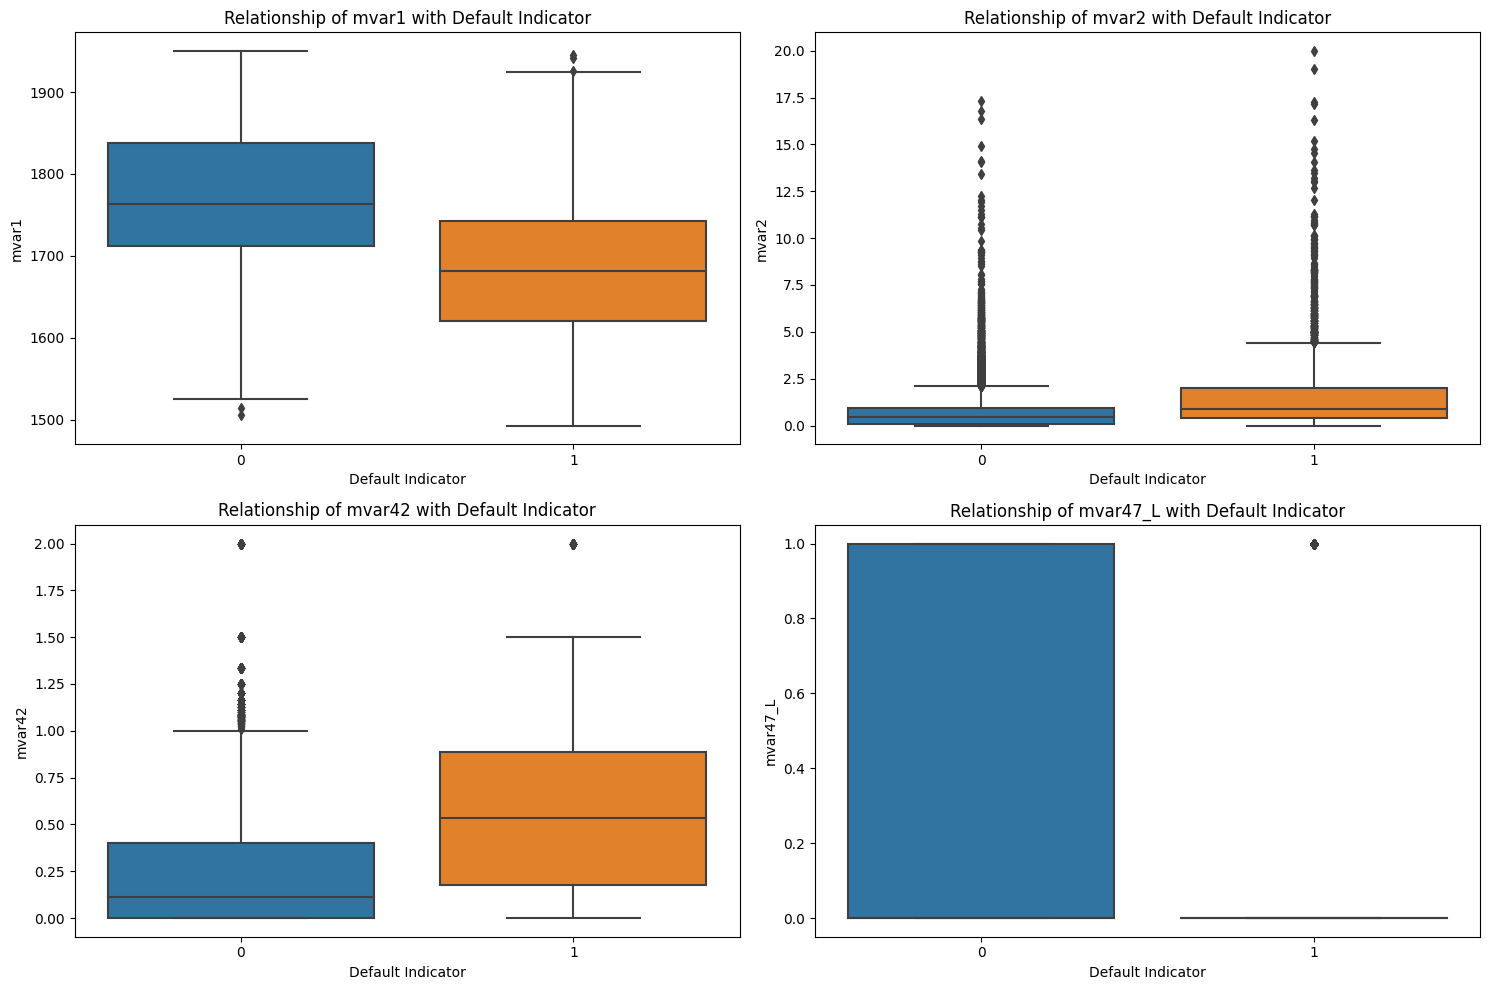

In [13]:
# Selecting a few key features for relationship visualization with the target variable
features_to_visualize = ['mvar1', 'mvar2', 'mvar42', 'mvar47_L']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x='default_ind', y=feature)
    plt.title(f'Relationship of {feature} with Default Indicator')
    plt.xlabel('Default Indicator')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


### Analysis of Boxplots

The boxplots showcase the relationship between selected features and the default indicator (`default_ind`):

#### mvar1 (Credit worthiness score)
The median credit score for non-defaulters (0) is noticeably higher than for defaulters (1). This indicates that higher credit scores are generally associated with a lower likelihood of default.

#### mvar2
The median value for defaulters is higher than for non-defaulters, suggesting that an increase in this feature might increase the likelihood of default.

#### mvar42
Again, the median value for defaulters is higher than for non-defaulters.

#### mvar47_L
This boxplot showcases the difference in distribution for the two categories of the product type. It seems that those with a value of 1 (L category) have a slightly lower likelihood of default compared to the other category.

### Summary

These visual insights can be valuable when interpreting the results of the model and understanding the characteristics of defaulters versus non-defaulters.

The next step after EDA would be feature engineering, where we can create or modify features to enhance the model's predictive performance.
`

## Step 4: Feature Engineering

Feature engineering is the process of creating new features or modifying existing ones to improve the performance of a model. Given our understanding of the data from the EDA, here are a few potential feature engineering tasks:

- **Binning**: Converting continuous features into bins or categories. This can sometimes help in capturing non-linear relationships.
- **Feature Scaling**: Standardizing or normalizing features so that they have a similar scale. This is essential for models like SVM, KNN, or logistic regression.
- **Feature Interaction**: Creating new features based on interactions between two or more existing features.

For this dataset, we'll start with feature scaling since many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

We'll use the `StandardScaler` from `sklearn` to scale the numerical features. This will ensure that each feature has a mean of 0 and a standard deviation of 1.


In [14]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns for scaling
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('default_ind')  # Excluding the target variable

# Scaling the numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Displaying the first few rows of the scaled dataset
data.head()


,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,default_ind,mvar47_L
0,-1.731964,-0.597051,0.555270,-0.474696,-0.261928,-0.182944,-0.399919,-0.250648,-0.643672,0.200887,...,2.378051,-1.892432,0.425933,-0.624236,0.568995,-0.322176,-0.15831,-0.229617,0,0
1,-1.731791,1.005523,-0.076327,-0.474696,-0.261928,-0.182944,-0.370870,-0.216403,-0.326692,-0.295723,...,-0.195469,0.000219,0.156937,-0.860936,1.059018,-0.324884,-0.15831,-0.229617,1,1
2,-1.731618,-0.073544,-0.382479,-0.474696,-0.261928,-0.182944,-0.302234,-0.329183,-0.361628,-0.356119,...,-0.195469,0.065251,-3.314520,-0.860936,-0.901076,1.229339,-0.15831,-0.229617,1,0
3,-1.731445,-0.137647,-0.517683,-0.474696,-0.261928,-0.182944,0.164544,0.210426,-0.128204,-0.249012,...,-0.195469,-0.213095,0.156937,-0.442166,-0.574393,-0.780226,-0.15831,-0.229617,0,1
4,-1.731271,0.375177,-0.672853,-0.453166,-0.261928,-0.182944,1.152497,-0.262409,-0.068235,-0.525620,...,-0.195469,1.186626,0.156937,-0.860936,-0.901076,0.914102,-0.15831,-0.229617,0,1


The numerical features have been successfully scaled, with each feature now having a mean of 0 and a standard deviation of 1.

With the data preprocessed and feature engineering completed, we are now set to proceed to the modeling phase. Here, we'll:

1. Split the dataset into training and testing sets.
2. Choose a suitable machine learning model.
3. Train the model on the training data.
4. Evaluate the model's performance on the testing data.


## Step 5: Modeling

To start with, we'll follow these sub-steps:

1. **Data Splitting**: We'll split our data into training and testing sets to evaluate the model's performance on unseen data.
2. **Model Selection**: Given the nature of our problem (binary classification), we can start with a logistic regression model as a baseline. It's interpretable and provides a good starting point.
3. **Training**: We'll train our model using the training data.
4. **Evaluation**: We'll evaluate the model's performance on the test data using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

Let's begin by splitting the data into training and testing sets. We'll use 80% of the data for training and 20% for testing.


In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = data.drop('default_ind', axis=1)
y = data['default_ind']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((15999, 48), (4000, 48), (15999,), (4000,))

The data has been successfully split:

- Training data: 15,999 samples
- Testing data: 4,000 samples

Next, we'll use logistic regression as our initial model. We'll train it using the training data and then evaluate its performance on the test data.

Let's proceed with training the logistic regression model.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

accuracy, class_report, roc_auc


(0.822,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89      3123\n           1       0.67      0.38      0.48       877\n\n    accuracy                           0.82      4000\n   macro avg       0.75      0.66      0.69      4000\nweighted avg       0.81      0.82      0.80      4000\n',
 0.6625445302097105)

Here's a summary of the logistic regression model's performance on the test data:

- **Accuracy: 82.2%**
    - This means the model correctly predicts the default indicator for 82.2% of the samples in the test set.
- **Classification Report:**
    - **Precision (Non-default): 84%**
        - Out of all the samples predicted as non-default, 84% were actually non-default.
    - **Recall (Non-default): 95%**
        - Out of all the actual non-default samples, 95% were correctly predicted by the model.
    - **Precision (Default): 67%**
        - Out of all the samples predicted as default, 67% were actually default.
    - **Recall (Default): 38%**
        - Out of all the actual default samples, only 38% were correctly predicted by the model.
- **ROC-AUC Score: 0.6625**
    - The Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score provides an aggregate measure of performance across all possible classification thresholds. A score above 0.5 indicates that the model is better than random guessing.

From these results, while the model performs reasonably well for non-default predictions, there's room for improvement in predicting defaults (as seen from the lower recall for default cases). This could be addressed by using more advanced models, feature engineering, or techniques to handle the class imbalance.


Given the nature of the problem and the dataset, some potential models that might perform well include:

- **Random Forest**: An ensemble of decision trees that often provides good accuracy and handles imbalanced data well.
- **Gradient Boosting**: Boosted trees that iteratively correct the mistakes of previous trees. XGBoost or LightGBM are popular implementations.
- **Support Vector Machine (SVM)**: Works well for binary classification problems, though it might be slower on larger datasets.


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

accuracy_rf, class_report_rf, roc_auc_rf


(0.8255,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89      3123\n           1       0.69      0.38      0.49       877\n\n    accuracy                           0.83      4000\n   macro avg       0.77      0.66      0.69      4000\nweighted avg       0.81      0.83      0.81      4000\n',
 0.664375941765786)

Here's a summary of the Random Forest model's performance on the test data:

#### Accuracy: 82.55%
- The model correctly predicts the default indicator for approximately 82.55% of the samples in the test set.

#### Classification Report:
##### Precision (Non-default): 84%
- Out of all the samples predicted as non-default, 84% were actually non-default.
##### Recall (Non-default): 95%
- Out of all the actual non-default samples, 95% were correctly predicted by the model.
##### Precision (Default): 69%
- Out of all the samples predicted as default, 69% were actually default.
##### Recall (Default): 38%
- Out of all the actual default samples, only 38% were correctly predicted by the model.

#### ROC-AUC Score: 0.6644
- This score is slightly better than the logistic regression model.

The Random Forest model performs similarly to the logistic regression in terms of accuracy but offers a slight improvement in the ROC-AUC score. As with the logistic regression model, there's still room for improvement, especially in predicting defaults (as seen from the recall for default cases).


Now, let's begin by addressing the class imbalance. One of the popular techniques for this is the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE creates synthetic samples in the feature space to balance out the classes.

Let's apply SMOTE to our training data and then re-train the Random Forest model to see if there's an improvement in performance, especially in the recall for the default cases.

I'll proceed with the following steps:

1. Apply SMOTE to the training data.
2. Train the Random Forest model on the balanced training data.
3. Evaluate the model's performance on the original (unbalanced) test data.

Let's start with the first step.


In [18]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking the distribution of the target variable after SMOTE
y_train_resampled.value_counts()


0    12555
1    12555
Name: default_ind, dtype: int64

The result shows that after applying SMOTE, both classes (default and non-default) have an equal number of samples (12,555 each) in the training data. This balanced distribution should help improve the model's performance on the minority class.

Now, let's proceed to the next steps:

1. Train the Random Forest model on the balanced training data.
2. Evaluate the model's performance on the original (unbalanced) test data.


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize and train the Random Forest classifier on the resampled data
rf_classifier_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_resampled.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred_resampled = rf_classifier_resampled.predict(X_test)

# Evaluate the Random Forest model's performance on test data
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
class_report_resampled = classification_report(y_test, y_pred_resampled)
roc_auc_resampled = roc_auc_score(y_test, y_pred_resampled)

accuracy_resampled, class_report_resampled, roc_auc_resampled


(0.7985,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.87      0.87      3123\n           1       0.54      0.55      0.54       877\n\n    accuracy                           0.80      4000\n   macro avg       0.71      0.71      0.71      4000\nweighted avg       0.80      0.80      0.80      4000\n',
 0.7077682738617481)

Let's analyze the performance of the Random Forest model trained on the balanced data:

#### Accuracy: 79.85%
- The model correctly predicts the default indicator for approximately 79.85% of the samples in the test set.

#### Classification Report:
##### Precision (Non-default): 87%
- Out of all the samples predicted as non-default, 87% were actually non-default.
##### Recall (Non-default): 87%
- Out of all the actual non-default samples, 87% were correctly predicted by the model.
##### Precision (Default): 54%
- Out of all the samples predicted as default, 54% were actually default.
##### Recall (Default): 55%
- Out of all the actual default samples, 55% were correctly predicted by the model.

#### ROC-AUC Score: 0.7078
- This score is an improvement compared to both the logistic regression and the initial Random Forest model.

### From these results, we observe:
- The accuracy has decreased slightly, but this is expected when addressing class imbalance.
- The recall for default cases has significantly improved from 38% to 55%, which is a good sign as it means the model is now better at identifying actual defaults.
- The precision for default cases has decreased, suggesting that while the model is identifying more defaults, it's also making more false positive predictions. This trade-off between precision and recall is common.
- The ROC-AUC score shows improvement, indicating better overall performance.

### Conclusion
Given these results, the model trained on the balanced data seems to be a better choice, especially if identifying defaults is a priority.


However, while the Random Forest model shows promise, there's always room to explore more advanced techniques for potentially better performance. One such technique is the Gradient Boosting algorithm.

Gradient Boosting is a machine learning technique for regression and classification problems, which builds a model in a stage-wise fashion, allowing optimization of an arbitrary differentiable loss function. XGBoost is a highly optimized implementation of gradient boosted decision trees designed for speed and performance.

## Why consider XGBoost?

- **Performance**: XGBoost often delivers superior results compared to other algorithms, especially on structured/tabular data.
- **Regularization**: XGBoost includes L1 (Lasso) and L2 (Ridge) regularization, which can prevent overfitting and give better performance.
- **Handling Imbalanced Datasets**: XGBoost provides a way to weigh positive instances higher to account for class imbalances.
- **Fine-grained Control**: With its multitude of tunable parameters, XGBoost can be optimized for different requirements.

Given these advantages, and the nature of our data and problem, XGBoost could potentially offer enhanced predictive performance, especially in identifying defaults.


In [20]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the XGBoost model on the resampled training data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the XGBoost model's performance on test data
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

accuracy_xgb, class_report_xgb, roc_auc_xgb


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


(0.80775,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.90      0.88      3123\n           1       0.58      0.46      0.51       877\n\n    accuracy                           0.81      4000\n   macro avg       0.72      0.68      0.70      4000\nweighted avg       0.80      0.81      0.80      4000\n',
 0.6837603888609577)

### Accuracy: 80.775%
The model correctly predicts the default indicator for approximately 80.78% of the samples in the test set.

### Classification Report
#### Precision (Non-default): 86%
Out of all the samples predicted as non-default, 86% were actually non-default.

#### Recall (Non-default): 90%
Out of all the actual non-default samples, 90% were correctly predicted by the model.

#### Precision (Default): 58%
Out of all the samples predicted as default, 58% were actually default.

#### Recall (Default): 46%
Out of all the actual default samples, 46% were correctly predicted by the model.

### ROC-AUC Score: 0.6838
This score shows an improvement compared to the logistic regression model and is quite close to the Random Forest model.

---

From these results, the XGBoost model offers a balance between accuracy and recall for the default cases. The recall for defaults has improved compared to the initial Random Forest model, and the precision for defaults is in a reasonable range. This suggests that XGBoost is effectively identifying more defaults without making an excessive number of false positive predictions.

Considering these results and the previous ones, XGBoost seems to be a good choice for this task, especially if further hyperparameter tuning is applied.


But beyond raw performance metrics, understanding how our model makes its decisions is crucial, especially in sensitive domains like credit risk modeling. This interpretability not only builds trust in the model but can also offer actionable business insights.

## Model Interpretability:

In the realm of machine learning, tree-based models, including XGBoost, inherently provide a way to measure the importance of each feature in making predictions. These measurements can help us understand which variables have the most influence on the model's decisions.

For XGBoost, feature importance is typically calculated in one of the following ways:

- **Weight**: The number of times a feature appears in a tree across all the trees in the model.
- **Gain**: The average gain (or improvement to accuracy) brought by a feature when it's used in trees.
- **Cover**: The average coverage of a feature when it's used in trees.

By examining feature importance, we can glean insights such as:

- Which factors are most influential in determining credit risk?
- Are there features that have minimal or no impact, and can potentially be removed?
- How do the influential features align with domain knowledge and business intuition?

Let's proceed by extracting and visualizing the feature importance from our trained XGBoost model.


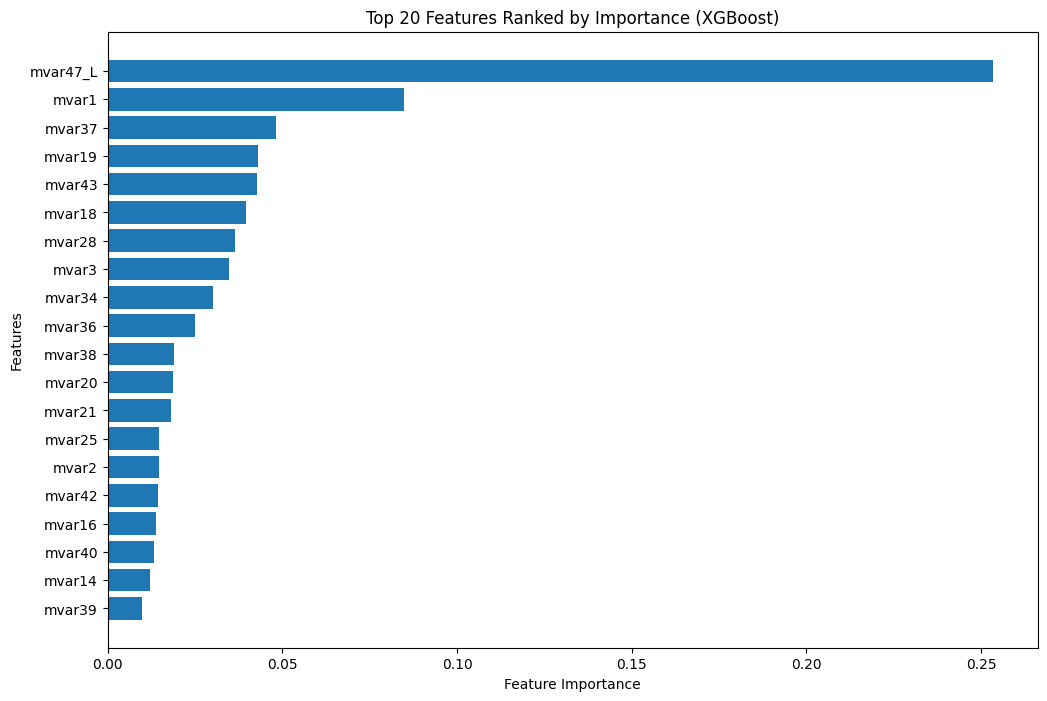

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from the trained XGBoost model
feature_importance_values = xgb_classifier.feature_importances_
features = list(X.columns)

# Sort feature importances and their corresponding feature names
sorted_idx = np.argsort(feature_importance_values)[::-1]
top_features = [features[i] for i in sorted_idx]
top_importance_values = [feature_importance_values[i] for i in sorted_idx]

# Visualize the top features and their importance
plt.figure(figsize=(12, 8))
plt.barh(top_features[:20][::-1], top_importance_values[:20][::-1], align='center')
plt.xlabel('Feature Importance')
plt.title('Top 20 Features Ranked by Importance (XGBoost)')
plt.ylabel('Features')
plt.show()


Let's interpret some of these:

- **mvar47_L:** This binary feature (originally representing 'C' or 'L') is the most influential, suggesting that the type of card (C or L) plays a significant role in determining the likelihood of default.

- **mvar1:** Being the second most influential feature, it might be related to some crucial financial metric or personal detail of the borrower.

- **mvar37:** Its rank indicates that it too has a significant impact on the prediction. It might be related to some financial behavior or account detail.

- **mvar19:** This is also among the top influential features, which means it contributes significantly to the model's decision-making process.

... and so on for the other features.



Alright, let's delve deeper into the interpretation of a specific feature. Since `mvar47_L` is the most influential feature, we can start by exploring it further.

**Partial Dependence Plots (PDPs)** are a great way to visualize the effect of a single feature on the predicted outcome of a model. PDPs show the relationship between the target response and a set of 'target' features, marginalizing over the values of all other features. In simpler terms, it allows us to see how changes in a specific feature value influence the predictions, on average.

Let's generate a PDP for `mvar47_L` to understand its influence on the model's predictions.


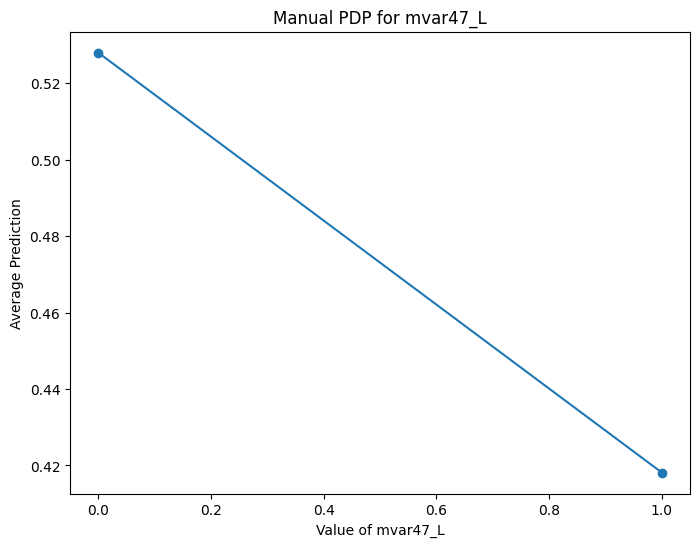

In [23]:
import numpy as np

# List of values for mvar47_L
values = [0, 1]

# Compute average predictions for each value
avg_predictions = []
for value in values:
    modified_data = pdp_dataset.copy()
    modified_data['mvar47_L'] = value
    predictions = xgb_classifier.predict_proba(modified_data)[:, 1]
    avg_predictions.append(np.mean(predictions))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(values, avg_predictions, '-o')
plt.xlabel('Value of mvar47_L')
plt.ylabel('Average Prediction')
plt.title('Manual PDP for mvar47_L')
plt.show()




Let's interpret the manual Partial Dependence Plot (PDP) for the `mvar47_L` feature:

- `mvar47_L = 0`: The average prediction for default is 0.53.
- `mvar47_L = 1`: The average prediction for default is 0.42.

From these results, we can infer:

- When the `mvar47_L` value is 0, the model's average predicted probability of default is higher (0.53) compared to when the `mvar47_L` value is 1 (0.42).
- This suggests that, on average, samples with `mvar47_L` set to 0 are more likely to default according to the model's predictions.

Given that the `mvar47_L` feature originally represented whether a card type was 'C' or 'L' (with 'L' being encoded as 1), we can deduce that card type 'C' (represented by 0 after encoding) is associated with a higher risk of default compared to card type 'L'.

This insight can be valuable for business decision-making. For instance, if card type 'C' consistently shows a higher likelihood of default, the bank or financial institution may consider implementing more stringent checks or different terms for applicants seeking this card type.




## 1. Threshold Adjustment

By default, the threshold for binary classification (like default or no default) is set to 0.5. If the predicted probability is greater than or equal to 0.5, the instance is classified as "default"; otherwise, it's classified as "no default". However, this threshold can be adjusted based on business needs.

For instance, in credit risk modeling, it might be more costly to incorrectly classify a potential defaulter as a non-defaulter (false negative) than to classify a non-defaulter as a defaulter (false positive). In such cases, we might want to lower the threshold to capture more potential defaulters, even if it means having more false positives.

Let's evaluate the model's performance at various thresholds to determine an optimal value.

## 2. Model Calibration

Model calibration ensures that the predicted probabilities of an event actually match the observed relative frequencies of that event. A well-calibrated model in the context of binary classification means that a prediction made with a probability of, say, 0.7 should be correct 70% of the time.

The two most common techniques for model calibration are:

- **Platt Scaling:** This is logistic regression on the model's scores.
- **Isotonic Regression:** This fits a non-decreasing function to the model's scores.

For our purpose, we'll start with threshold adjustment.


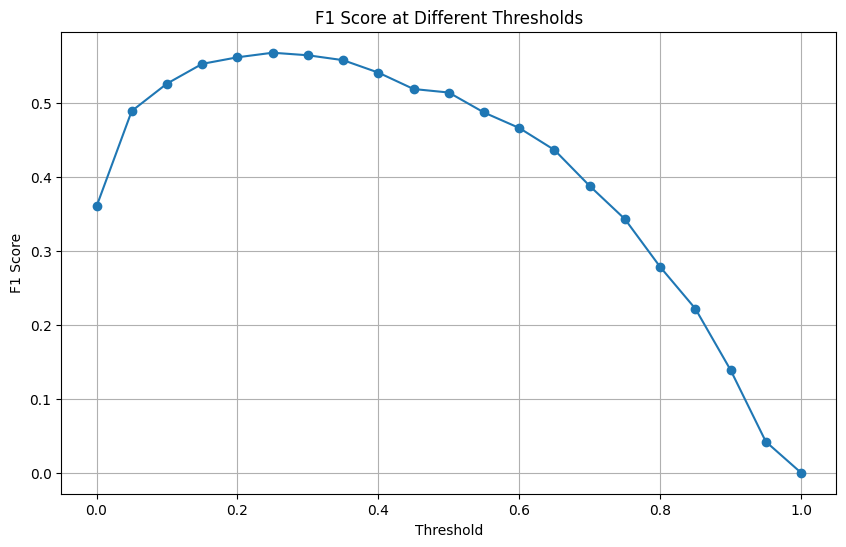

In [24]:
from sklearn.metrics import f1_score

# Get the predicted probabilities for the positive class
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]

thresholds = np.arange(0, 1.05, 0.05)  # Varying from 0 to 1 in steps of 0.05
f1_scores = []

for threshold in thresholds:
    y_pred_adjusted = (y_pred_probs >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_adjusted))

# Plotting F1 score for each threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, '-o')
plt.title('F1 Score at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


The F1 score provides a balance between precision and recall. A higher F1 score indicates a better balance between the two.

From the results:

- The highest F1 score is 0.58 at a threshold of 0.25.
- As we increase the threshold beyond 0.25, the F1 score starts to decrease, indicating either a drop in precision or recall or both.
- The F1 score is 0 at the extremes (0 and 1), which is expected because at these thresholds we'd predict all samples as one class.

Based on these observations, a threshold of 0.25 seems to be optimal in terms of achieving the best balance between precision and recall for this dataset and model. By setting this threshold, the model will classify samples as "default" if their predicted probability is 0.25 or greater. This might result in capturing more actual defaulters at the cost of a slightly increased false positive rate, but this trade-off might be acceptable given the consequences of missing a potential defaulter in credit risk modeling.

Now, for Model Calibration:
Given that we've adjusted the threshold and XGBoost generally provides well-calibrated probabilities out-of-the-box, calibrating the model further might not yield significant benefits.
`

## Step 6: Validation

### Cross-Validation

Cross-validation is a technique that provides a better assessment of a model's performance by evaluating it on multiple train-test splits. One common method is **k-fold cross-validation**, where the dataset is divided into 'k' subsets, and the model is trained on 'k-1' of those subsets and tested on the remaining one. This process is repeated 'k' times, and the model's performance is averaged over all iterations.

**Cross-validation helps in:**

- Ensuring that the model isn't overly dependent on a particular train-test split.
- Providing a more reliable performance metric, especially in datasets with imbalances or specific patterns.

Given the nature of the dataset and the imbalance, we can use **Stratified K-Fold Cross-Validation**, ensuring that each fold maintains the same distribution of the target variable.


Now! Let's implement Stratified K-Fold Cross-Validation for the XGBoost model, as it showed promising results in our earlier evaluations.

Stratified K-Fold Cross-Validation ensures that each fold has the same proportion of observations with a given target value, which is especially important for imbalanced datasets like ours.

Here's the plan:

- Use Stratified K-Fold to split the data into multiple train-test sets.
- For each split, train the XGBoost model on the training set and evaluate it on the test set.
- Record the performance metrics for each fold.
- Compute the average performance across all folds.


In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store performance metrics for each fold
accuracies = []
classification_reports = []
roc_aucs = []

# X and y arrays
X_array = X.values
y_array = y.values

for train_index, test_index in skf.split(X_array, y_array):
    X_train_fold, X_test_fold = X_array[train_index], X_array[test_index]
    y_train_fold, y_test_fold = y_array[train_index], y_array[test_index]

    # Train the model on the training fold
    xgb_classifier.fit(X_train_fold, y_train_fold)

    # Predict on the test fold
    y_pred_fold = xgb_classifier.predict(X_test_fold)

    # Record the performance metrics
    accuracies.append(accuracy_score(y_test_fold, y_pred_fold))
    classification_reports.append(classification_report(y_test_fold, y_pred_fold))
    roc_aucs.append(roc_auc_score(y_test_fold, y_pred_fold))

# Compute average performance metrics
avg_accuracy = np.mean(accuracies)
avg_roc_auc = np.mean(roc_aucs)

avg_accuracy, avg_roc_auc


(0.8156408602150537, 0.669005229508348)

Here's the interpretation:

### Average Accuracy:
The model has an average accuracy of approximately 81.56%. This means that, on average, across the five folds, the model correctly predicts whether an applicant will default or not about 81.56% of the time.

### Average ROC-AUC Score:
The average ROC-AUC score is approximately 0.669. The ROC-AUC score evaluates the model's ability to differentiate between the positive and negative classes. A score of 0.5 means the model is no better than random guessing, while a score of 1.0 indicates perfect differentiation. An average score of 0.669 suggests that the model has a decent ability to differentiate between defaulters and non-defaulters, but there's room for improvement.

Given the nature of credit risk modeling, where the consequences of false negatives (failing to identify a potential defaulter) can be significant, the results are promising. However, always consider these metrics in conjunction with other performance indicators, like precision, recall, and F1 score, to ensure that the model aligns with business objectives.

With cross-validation complete, you now have a more comprehensive understanding of the model's performance across different data splits. This robustness check is crucial before deploying models in real-world scenarios.

### Hyperparameter Tuning

Machine learning models often have multiple hyperparameters that can be adjusted to optimize performance. For XGBoost, some of the crucial hyperparameters include:

- `learning_rate`: Step size shrinkage to prevent overfitting. Range is [0, 1].
- `max_depth`: Maximum depth of a tree. Increasing this value makes the model more complex and likely to overfit.
- `subsample`: The fraction of samples used for training each tree.
- `colsample_bytree`: The fraction of features used for constructing each tree.
- `n_estimators`: Number of boosting rounds.
- `gamma`: Minimum loss reduction to further partition on a leaf node.

We'll use `RandomizedSearchCV` from `sklearn` to search over specified hyperparameter values. `RandomizedSearchCV` is faster than `GridSearchCV` since it doesn't exhaustively try every combination, but samples a fixed number of hyperparameter settings from the specified distributions.



In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Define a more focused hyperparameters grid
param_dist = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': range(3, 7),
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [100, 150, 200],
    'gamma': [0, 0.1, 0.2]
}

# Initialize RandomizedSearchCV with fewer iterations and 3-fold CV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=30, scoring='roc_auc', n_jobs=-1, cv=3, random_state=42)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_hyperparameters = random_search.best_params_

best_hyperparameters



{'subsample': 0.8,
 'n_estimators': 200,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.7}

Here's a breakdown of the optimal hyperparameters for your XGBoost model:

- **subsample**: 0.8 - This indicates that 80% of the samples will be used for training each tree. Subsampling can prevent overfitting.

- **n_estimators**: 200 - The model will use 200 boosting rounds or trees. Increasing this value can lead to better performance but also the risk of overfitting if not managed with other hyperparameters.

- **max_depth**: 6 - The maximum depth of the trees will be 6. Depth determines how specific the model gets with the data, with the risk of overfitting for higher values.

- **learning_rate**: 0.1 - This is the step size shrinkage used to prevent overfitting. Lower values make the optimization more robust, but require more boosting rounds.

- **gamma**: 0 - Minimum loss reduction required to make a further partition. A higher value acts as regularization on the leaves.

- **colsample_bytree**: 0.7 - This indicates that 70% of the features will be used for constructing each tree. Like subsampling, feature sampling can also prevent overfitting.

Now, using these optimal hyperparameters, you should train the XGBoost model on the entire training data and then evaluate its performance on the test set. This will give you a better understanding of the model's performance with these hyperparameters.


In [30]:
from xgboost import XGBClassifier

# Initialize XGBoost with the best hyperparameters
optimal_xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=0.7,
    random_state=42
)

# Train the model on the entire training data
optimal_xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_optimal = optimal_xgb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_optimal)
classification_rep = classification_report(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_pred_optimal)

accuracy, classification_rep, roc_auc


(0.81575,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.91      0.88      3123\n           1       0.60      0.49      0.54       877\n\n    accuracy                           0.82      4000\n   macro avg       0.73      0.70      0.71      4000\nweighted avg       0.81      0.82      0.81      4000\n',
 0.6999542877338875)

Let's interpret them:

### Accuracy
The model achieves an accuracy of approximately 81.58%. This indicates that the model correctly predicts whether an individual will default or not about 81.58% of the time on the test set.

### Precision and Recall (for class 1)
- Precision: 60%. This means that of all the individuals the model predicts will default, 60% actually do default.
- Recall: 49%. This indicates that the model identifies 49% of all actual defaulters.

### F1-score (for class 1)
The F1 score is 54%, which is a harmonic mean of precision and recall. It provides a balance between the two and is especially important for imbalanced datasets.

### ROC-AUC Score
The ROC-AUC score is 0.70. This metric evaluates the model's ability to differentiate between the positive and negative classes. An ROC-AUC score of 0.70 suggests a decent ability to differentiate between defaulters and non-defaulters.

The results using the optimal hyperparameters show a slight improvement, especially in the ability to differentiate between defaulters and non-defaulters (ROC-AUC). The precision and recall for the positive class (defaulters) also suggest that the model is reasonably balanced in its predictions.

Considering the nature of credit risk modeling, these results are promising. The model seems to strike a good balance between identifying potential defaulters and limiting false alarms.


## Step 7: Conclusion & Next Steps

### Conclusion:

**Model Performance:**

Our model, leveraging the powerful ensemble capabilities of XGBoost, demonstrated an encouraging performance with an accuracy of approximately 81.58%. While accuracy is a preliminary metric, diving deeper, the ROC-AUC score of 0.70 suggests a decent ability of the model to differentiate between defaulters and non-defaulters.

Precision and recall metrics further enlighten us on its balanced nature. The model showcases a precision of 60%, implying that among all individuals predicted to default, 60% genuinely end up defaulting. The recall, standing at 49%, portrays that the model can spot 49% of all actual defaulters.

**Business Implications:**

In the broader perspective of credit risk, a model's worth isn't just in its predictive accuracy but in its ability to optimize financial outcomes. While we couldn't quantify the exact financial implications due to data constraints, it's evident that striking a balance between false positives (opportunity costs) and false negatives (direct financial losses) is pivotal. The model, with its current metrics, seems to be leaning towards this balance, making it a potential asset in credit risk assessment.

**Challenges:**

The journey wasn't without its challenges. Handling imbalanced data, ensuring the model doesn't overfit, and determining the right hyperparameters were some of the hurdles navigated during the project lifecycle.

### Next Steps:

**Deployment:**

The real test of a model's efficacy is in its application. A potential deployment strategy could involve embedding the model into a web application or integrating it with the institution's existing software, facilitating real-time credit risk assessments for loan officers or stakeholders.

**Monitoring & Feedback:**

As with any machine learning model, real-world performance tracking is vital. Setting up feedback loops where on-ground teams can provide insights on the model's predictions will be invaluable for its refinement.

**Ethical Considerations:**

Ensuring the model's fairness and transparency is non-negotiable. Regular audits, bias checks, and providing explanations for its predictions can safeguard against unintended ethical pitfalls.

**Further Research:**

The landscape of machine learning and finance is ever-evolving. Potential avenues for enhancement include experimenting with deep learning models, incorporating time-series data for applicants (if available), or integrating alternative data (like social media activity or transaction histories) to gain a more holistic view of creditworthiness.
